In [13]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [14]:
df = yf.download('AAPL', start='2020-01-01', end='2024-01-01')
print(df.head())

[*********************100%***********************]  1 of 1 completed

Price           Close       High        Low       Open     Volume
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL
Date                                                             
2020-01-02  72.468262  72.528582  71.223259  71.476600  135480400
2020-01-03  71.763718  72.523746  71.539330  71.696160  146322800
2020-01-06  72.335556  72.374162  70.634539  70.885472  118387200
2020-01-07  71.995346  72.600952  71.775781  72.345197  108872000
2020-01-08  73.153473  73.455072  71.698559  71.698559  132079200


In [15]:
df.loc[:,"Target"] = df["Close"].shift(-1)

In [16]:
df = df[: -1]

In [19]:
x = df[["Open","High","Low","Close","Volume"]]
y = df["Target"]

In [20]:
x_train , x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, shuffle = False)

In [21]:
model = LinearRegression()

In [22]:
model.fit(x_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [23]:
pred = model.predict(x_test)

In [24]:
mse = mean_squared_error(y_test, pred)
r2 = r2_score(y_test, pred)

In [25]:
print("Mean Squared Error: " , mse)
print("R2 Score: ", r2)

Mean Squared Error:  4.4065714913487835
R2 Score:  0.9625624154233361


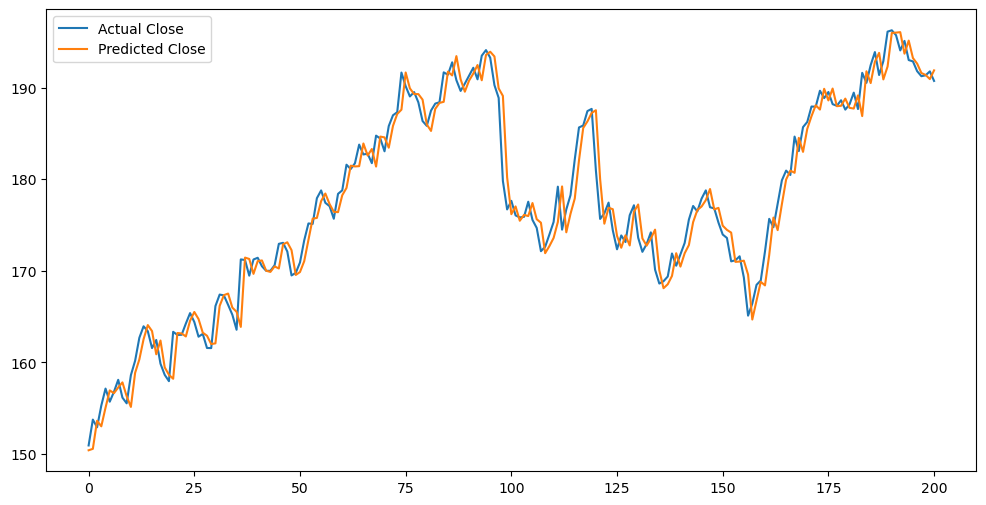

In [26]:
plt.figure(figsize= (12,6))
plt.plot(y_test.values, label="Actual Close")
plt.plot(pred, label="Predicted Close")
plt.legend()
plt.show()